# Importing modules and dataset

In [ ]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



In [6]:
pwd

'/content'

In [9]:
df = pd.read_csv('/content/sample_data/Dataset.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200315290,KWI in,2019-03-07 00:00:00,2019.0,1.928827e+09,2019-02-20,20190220,20190220,20190307.0,USD,RV,1.0,NaN,21227.05,20190220.0,NAA8,1.928827e+09,0.0
1,U001,0200769623,WAL-MAR foundation,2020-01-16 00:00:00,2020.0,1.930350e+09,2020-01-04,20200103,20200104,20200119.0,USD,RV,1.0,NaN,5669.72,20200104.0,NAH4,1.930350e+09,0.0
2,U001,0200820380,SMITH'S associates,2019-07-08 00:00:00,2019.0,1.929517e+09,2019-06-21,20190619,20190621,20190706.0,USD,RV,1.0,NaN,67968.48,20190621.0,NAA8,1.929517e+09,0.0
3,U001,0200769623,WAL-MAR corp,2019-03-22 00:00:00,2019.0,1.928943e+09,2019-03-12,20190311,20190312,20190327.0,USD,RV,1.0,NaN,61395.73,20190312.0,NAH4,1.928943e+09,0.0
4,U001,200230690,DECA in,2019-06-03 00:00:00,2019.0,1.929350e+09,2019-05-21,20190521,20190521,20190608.0,USD,RV,1.0,NaN,1067.72,20190516.0,NAM4,1.929350e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26274,U001,0200754118,ARMY co,2020-01-29 00:00:00,2020.0,1.930339e+09,2020-01-02,20191231,20200102,20200117.0,USD,RV,1.0,NaN,110826.17,20200102.0,NAA8,1.930339e+09,0.0
26275,U001,0200783609,PROFIC co,2019-11-26 00:00:00,2019.0,1.930038e+09,2019-10-23,20191021,20191023,20191124.0,USD,RV,1.0,NaN,11501.00,20191023.0,NA32,1.930038e+09,0.0
26276,U001,0200744019,TARG corp,2019-09-03 00:00:00,2019.0,1.929755e+09,2019-08-18,20190817,20190818,20190902.0,USD,RV,1.0,NaN,2333.49,20190818.0,NAA8,1.929755e+09,0.0
26277,U001,0200794332,COST systems,2019-08-01 00:00:00,2019.0,1.929628e+09,2019-07-17,20190717,20190717,20190801.0,USD,RV,1.0,NaN,25501.01,20190717.0,NAAX,1.929628e+09,0.0


# PRE-PROCESSING

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26279 entries, 0 to 26278
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           26279 non-null  object 
 1   cust_number             26279 non-null  object 
 2   name_customer           26279 non-null  object 
 3   clear_date              26279 non-null  object 
 4   buisness_year           26279 non-null  float64
 5   doc_id                  26279 non-null  float64
 6   posting_date            26279 non-null  object 
 7   document_create_date    26279 non-null  int64  
 8   document_create_date.1  26279 non-null  int64  
 9   due_in_date             26279 non-null  float64
 10  invoice_currency        26279 non-null  object 
 11  document type           26279 non-null  object 
 12  posting_id              26279 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       26278 non-null

We can see that there are NULL values in clear_date --> which we will use to split in test and train later.     
area_business is totally NULL. 
There are 3 NULL values in invoice_id, we'll look into it later.

In [11]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             26279
total_open_amount             1
baseline_create_date          1
cust_payment_terms            1
invoice_id                    3
isOpen                        1
dtype: int64

### Date-Time Conversion

In [12]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['document_create_date.1'].head()

0   2019-02-20
1   2020-01-04
2   2019-06-21
3   2019-03-12
4   2019-05-21
Name: document_create_date.1, dtype: datetime64[ns]

In [13]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d %H:%M:%S')
df['clear_date'].head()

0   2019-03-07
1   2020-01-16
2   2019-07-08
3   2019-03-22
4   2019-06-03
Name: clear_date, dtype: datetime64[ns]

In [14]:
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['posting_date'].head()

0   2019-02-20
1   2020-01-04
2   2019-06-21
3   2019-03-12
4   2019-05-21
Name: posting_date, dtype: datetime64[ns]

In [15]:

df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['due_in_date'].head()

0   2019-03-07
1   2020-01-19
2   2019-07-06
3   2019-03-27
4   2019-06-08
Name: due_in_date, dtype: datetime64[ns]

In [16]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['baseline_create_date'].head()

0   2019-02-20
1   2020-01-04
2   2019-06-21
3   2019-03-12
4   2019-05-16
Name: baseline_create_date, dtype: datetime64[ns]

In [17]:
# looking at the converted data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26279 entries, 0 to 26278
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           26279 non-null  object        
 1   cust_number             26279 non-null  object        
 2   name_customer           26279 non-null  object        
 3   clear_date              26279 non-null  datetime64[ns]
 4   buisness_year           26279 non-null  float64       
 5   doc_id                  26279 non-null  float64       
 6   posting_date            26279 non-null  datetime64[ns]
 7   document_create_date    26279 non-null  int64         
 8   document_create_date.1  26279 non-null  datetime64[ns]
 9   due_in_date             26279 non-null  datetime64[ns]
 10  invoice_currency        26279 non-null  object        
 11  document type           26279 non-null  object        
 12  posting_id              26279 non-null  float6

### Dropping columns with ALL NULL values.

In [18]:
df.dropna(axis=1,how='all',inplace=True)
df.shape

(26279, 18)

We dropped area_business

### Dropping null values in invoice id
invoice id has only 49997 unique values of 50000. So let's analyse it a bit.

In [19]:
df["document type"].value_counts()

RV    26277
X2        2
Name: document type, dtype: int64

We see that where the invoice id is missing the document type is X2 and posting date is different from document create date. Since their are only 3 values and invoice_id needs to be unique we can drop these rows

In [20]:
df.dropna(axis=0,subset=['invoice_id'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200315290,KWI in,2019-03-07,2019.0,1.928827e+09,2019-02-20,20190220,2019-02-20,2019-03-07,USD,RV,1.0,21227.05,2019-02-20,NAA8,1.928827e+09,0.0
1,U001,0200769623,WAL-MAR foundation,2020-01-16,2020.0,1.930350e+09,2020-01-04,20200103,2020-01-04,2020-01-19,USD,RV,1.0,5669.72,2020-01-04,NAH4,1.930350e+09,0.0
2,U001,0200820380,SMITH'S associates,2019-07-08,2019.0,1.929517e+09,2019-06-21,20190619,2019-06-21,2019-07-06,USD,RV,1.0,67968.48,2019-06-21,NAA8,1.929517e+09,0.0
3,U001,0200769623,WAL-MAR corp,2019-03-22,2019.0,1.928943e+09,2019-03-12,20190311,2019-03-12,2019-03-27,USD,RV,1.0,61395.73,2019-03-12,NAH4,1.928943e+09,0.0
4,U001,200230690,DECA in,2019-06-03,2019.0,1.929350e+09,2019-05-21,20190521,2019-05-21,2019-06-08,USD,RV,1.0,1067.72,2019-05-16,NAM4,1.929350e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26271,U001,0200606231,INTER systems,2019-06-21,2019.0,1.929420e+09,2019-06-06,20190603,2019-06-06,2019-06-21,USD,RV,1.0,9792.82,2019-06-06,NAA8,1.929420e+09,0.0
26272,U001,0200754118,ARMY co,2020-01-29,2020.0,1.930339e+09,2020-01-02,20191231,2020-01-02,2020-01-17,USD,RV,1.0,110826.17,2020-01-02,NAA8,1.930339e+09,0.0
26273,U001,0200783609,PROFIC co,2019-11-26,2019.0,1.930038e+09,2019-10-23,20191021,2019-10-23,2019-11-24,USD,RV,1.0,11501.00,2019-10-23,NA32,1.930038e+09,0.0
26274,U001,0200744019,TARG corp,2019-09-03,2019.0,1.929755e+09,2019-08-18,20190817,2019-08-18,2019-09-02,USD,RV,1.0,2333.49,2019-08-18,NAA8,1.929755e+09,0.0


### Checking for unique values in each column

In [21]:
 for cols in df.columns:   
    print(f"{cols} - {df[f'{cols}'].nunique()}")

business_code - 6
cust_number - 1185
name_customer - 3274
clear_date - 386
buisness_year - 2
doc_id - 26276
posting_date - 422
document_create_date - 427
document_create_date.1 - 422
due_in_date - 480
invoice_currency - 2
document type - 1
posting_id - 1
total_open_amount - 24311
baseline_create_date - 427
cust_payment_terms - 67
invoice_id - 26276
isOpen - 1


There is only 1 unique value in document type and posting_id. We can drop these.

In [22]:
unique_cols =  [x for x in df.columns if df[x].nunique()==1] 
print(unique_cols)
df.drop(unique_cols,axis=1,inplace=True)
df.columns

['document type', 'posting_id', 'isOpen']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id'],
      dtype='object')

Now let's check for NULL values again.

In [23]:
df.isnull().any()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                False
dtype: bool

No null(except clear-date) values so moving on to removing duplicate columns.

### Duplicate column removal

In [24]:
# function to find duplicate columns
def findDuplicateColumns(df):
    duplicatecolumns=set()
    for x in range(df.shape[1]):
        col1=df.iloc[:,x]
        for y in range(x+1,df.shape[1]):
            col2=df.iloc[:,y]
            if col1.equals(col2):
                duplicatecolumns.add(df.columns.values[x])
    return list(duplicatecolumns)

Using user-defined function as the in-built function was computationally expensive.

In [25]:
dr=findDuplicateColumns(df)
dr

['doc_id', 'posting_date']

In [26]:
df.drop(columns=dr,inplace=True) 

We dropped posting_date and doc_id.

Now, to avoid discrepancy between document_create_date and document_create_date.1 we drop document_create_date and instead use document_create_date.1

In [27]:
df.drop(columns=['document_create_date'],inplace=True)

Also, invoice id is unique for each transaction and don't affect the sales, so we drop it.

In [28]:
df.drop(columns=['invoice_id'],inplace=True) 
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200315290,KWI in,2019-03-07,2019.0,2019-02-20,2019-03-07,USD,21227.05,2019-02-20,NAA8
1,U001,0200769623,WAL-MAR foundation,2020-01-16,2020.0,2020-01-04,2020-01-19,USD,5669.72,2020-01-04,NAH4
2,U001,0200820380,SMITH'S associates,2019-07-08,2019.0,2019-06-21,2019-07-06,USD,67968.48,2019-06-21,NAA8
3,U001,0200769623,WAL-MAR corp,2019-03-22,2019.0,2019-03-12,2019-03-27,USD,61395.73,2019-03-12,NAH4
4,U001,200230690,DECA in,2019-06-03,2019.0,2019-05-21,2019-06-08,USD,1067.72,2019-05-16,NAM4
...,...,...,...,...,...,...,...,...,...,...,...
26271,U001,0200606231,INTER systems,2019-06-21,2019.0,2019-06-06,2019-06-21,USD,9792.82,2019-06-06,NAA8
26272,U001,0200754118,ARMY co,2020-01-29,2020.0,2020-01-02,2020-01-17,USD,110826.17,2020-01-02,NAA8
26273,U001,0200783609,PROFIC co,2019-11-26,2019.0,2019-10-23,2019-11-24,USD,11501.00,2019-10-23,NA32
26274,U001,0200744019,TARG corp,2019-09-03,2019.0,2019-08-18,2019-09-02,USD,2333.49,2019-08-18,NAA8


# TARGET VARIABLE AND SORT
Our model cant take in dates for prediction so our target column will not be clear_date. Instead it will be the delay column as delay will be in int format which our model can predict.

clear_date - due_date will tell us how much delay was there in paying. 
 
 "-" indicates it has been paid off before due date. 
 "+" indicates it has been paid off after the due date

In [29]:

df['delay']=(df['clear_date']-df['due_in_date']).dt.days

Sorting in ascending order by document_create_date.1

In [30]:
df.sort_values(by='document_create_date.1',inplace=True) # sorting in ascending order by document_create_date.1
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
4663,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14902.13,2018-12-30,NAH4,-5
9016,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9081.20,2018-12-30,NAH4,1
8597,U001,0200794332,COST corp,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,32715.47,2018-12-30,NAAX,0
10263,U001,0200723794,MID MO trust,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,169989.59,2018-12-30,NAA8,0
4200,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,271.96,2018-12-30,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25195,U001,0200744707,PERFOR,2020-03-16,2020.0,2020-02-27,2020-03-13,USD,39408.22,2020-02-27,NAA8,3
20839,U001,0200721222,GO associates,2020-03-13,2020.0,2020-02-27,2020-05-02,USD,10770.76,2020-02-27,NAGD,-50
15489,U001,0100049079,ESSEX in,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,14271.00,2020-02-27,NAA8,6
14025,U001,0200895843,US,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,894.72,2020-02-27,NAA8,0


# SPLITTING
Creating test set on null clear_date

In [31]:

test_data = df[df.clear_date.isnull()].reset_index()
test_data.drop(columns=['index'],inplace=True)
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay


In [32]:
ts = test_data.copy()

Splitting test_set into x_test and y_test

In [33]:

y_test = test_data["delay"]
y_test

Series([], Name: delay, dtype: int64)

In [34]:
x_test = test_data.iloc[:,:-1].copy()
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms


### Creating a seprate data frame out of which we will extract val1, val2 and final train set.
WHOLE DATA ---> [TRAIN_DATA + VAL1 (1.5 MONTHS) + VAL2 (1.5 MONTHS)] + TEST_DATA

In [35]:
train_data2 = df[df.clear_date.notnull()].reset_index() #train set on non-null clear date
train_data2.drop(columns=['index'],inplace=True)
train_data2

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14902.13,2018-12-30,NAH4,-5
1,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9081.20,2018-12-30,NAH4,1
2,U001,0200794332,COST corp,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,32715.47,2018-12-30,NAAX,0
3,U001,0200723794,MID MO trust,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,169989.59,2018-12-30,NAA8,0
4,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,271.96,2018-12-30,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26271,U001,0200744707,PERFOR,2020-03-16,2020.0,2020-02-27,2020-03-13,USD,39408.22,2020-02-27,NAA8,3
26272,U001,0200721222,GO associates,2020-03-13,2020.0,2020-02-27,2020-05-02,USD,10770.76,2020-02-27,NAGD,-50
26273,U001,0100049079,ESSEX in,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,14271.00,2020-02-27,NAA8,6
26274,U001,0200895843,US,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,894.72,2020-02-27,NAA8,0


In [36]:
# Making use of offset to find date 1.5 months prior to 2020-02-27
x = train_data2['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y = train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] <= x].iloc[-1]
print(y) 
train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] == y].last_valid_index()

2020-01-12 00:00:00


23553

This gives the date which is 1.5 months prior to 2020-02-27.

val2 will start from 2020-01-13 to 2020-02-27

In [37]:
# dataframe for val2
val2 = train_data2.iloc[40519: , :].copy()
val2.reset_index(drop=True,inplace=True)
val2

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay


Removing val2 from train_data2 and storing into new dataframe to extract val1.

In [38]:
train_data1 = pd.concat([train_data2, val2]).drop_duplicates(keep=False)
train_data1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14902.13,2018-12-30,NAH4,-5
1,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9081.20,2018-12-30,NAH4,1
2,U001,0200794332,COST corp,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,32715.47,2018-12-30,NAAX,0
3,U001,0200723794,MID MO trust,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,169989.59,2018-12-30,NAA8,0
4,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,271.96,2018-12-30,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26271,U001,0200744707,PERFOR,2020-03-16,2020.0,2020-02-27,2020-03-13,USD,39408.22,2020-02-27,NAA8,3
26272,U001,0200721222,GO associates,2020-03-13,2020.0,2020-02-27,2020-05-02,USD,10770.76,2020-02-27,NAGD,-50
26273,U001,0100049079,ESSEX in,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,14271.00,2020-02-27,NAA8,6
26274,U001,0200895843,US,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,894.72,2020-02-27,NAA8,0


In [39]:
x2 = train_data1['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y2 = train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] <= x2].iloc[-1]
print(y2)
train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] == y2].last_valid_index() 

2020-01-12 00:00:00


23553

This gives the date which is 1.5 months prior to 2020-01-13 (start of val2).

val1 will start from 2019-11-28 to 2020-01-12.

In [40]:
val1 = train_data1.iloc[37251: , :].copy()
val1.reset_index(drop=True,inplace=True)
val1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay


Removing val1 from the dataframe and making the final train set.

In [41]:
train_data = pd.concat([train_data1, val1]).drop_duplicates(keep=False)
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14902.13,2018-12-30,NAH4,-5
1,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9081.20,2018-12-30,NAH4,1
2,U001,0200794332,COST corp,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,32715.47,2018-12-30,NAAX,0
3,U001,0200723794,MID MO trust,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,169989.59,2018-12-30,NAA8,0
4,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,271.96,2018-12-30,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26271,U001,0200744707,PERFOR,2020-03-16,2020.0,2020-02-27,2020-03-13,USD,39408.22,2020-02-27,NAA8,3
26272,U001,0200721222,GO associates,2020-03-13,2020.0,2020-02-27,2020-05-02,USD,10770.76,2020-02-27,NAGD,-50
26273,U001,0100049079,ESSEX in,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,14271.00,2020-02-27,NAA8,6
26274,U001,0200895843,US,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,894.72,2020-02-27,NAA8,0


We successfully splitted the data into train, val1, val2, and test set.

# EDA on train set

## UNIVARIATE ANALYSIS

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26260 entries, 0 to 26275
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           26260 non-null  object        
 1   cust_number             26260 non-null  object        
 2   name_customer           26260 non-null  object        
 3   clear_date              26260 non-null  datetime64[ns]
 4   buisness_year           26260 non-null  float64       
 5   document_create_date.1  26260 non-null  datetime64[ns]
 6   due_in_date             26260 non-null  datetime64[ns]
 7   invoice_currency        26260 non-null  object        
 8   total_open_amount       26260 non-null  float64       
 9   baseline_create_date    26260 non-null  datetime64[ns]
 10  cust_payment_terms      26260 non-null  object        
 11  delay                   26260 non-null  int64         
dtypes: datetime64[ns](4), float64(2), int64(1), ob

We can see there are no null values in our dataset. There are only 3 continuous variable column i.e. buisness_year, total_open_amount and delay,

### business_code
company code of the account

In [43]:
train_data.business_code.value_counts()

U001    23802
CA02     2006
U013      350
U002       95
U005        5
U007        2
Name: business_code, dtype: int64

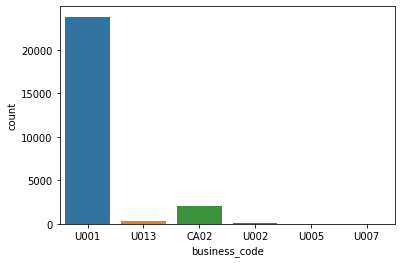

In [44]:
sns.countplot(x = train_data['business_code'])

As there are only 6 values we can apply encoding on it later.

### cust_number
customer number given to all the customers of the Account.

In [45]:
train_data.cust_number.value_counts()

0200769623    5884
0200726979    1017
0200762301     723
0200759878     681
0200794332     597
              ... 
140105000        1
0200429605       1
0200122006       1
200793088        1
0200703836       1
Name: cust_number, Length: 1185, dtype: int64

In [46]:
len(dict(train_data.cust_number.value_counts()))

1185


There are 1359 unique customers or comapny that we have transactions with.

cust_number represent account no of different companies. For eg WAL-MAR has many varities that is WAL-MAR corporation, WAL-MAR systems etc but they have the same cust_number.

### name_customer
name of the customer.

In [47]:
train_data.name_customer.value_counts()

WAL-MAR foundation    596
WAL-MAR trust         588
WAL-MAR us            587
WAL-MAR corp          587
WAL-MAR systems       577
                     ... 
MULT co                 1
PE trust                1
CORN corp               1
BI trust                1
ACC D trust             1
Name: name_customer, Length: 3273, dtype: int64

Companies Like WAL-MAR, WAL-MAR systems, etc belong to company WAL-MAR and have a unique customer_num to their name hence this column will be dropped.

### clear_date
The date on which the customer clears an invoice, or in simple terms, they make the full payment.

In [48]:
train_data.clear_date.min()

Timestamp('2019-01-04 00:00:00')

In [49]:
train_data.clear_date.max()

Timestamp('2020-05-15 00:00:00')

Our clear_date ranges for 362 days.

In [50]:
clear_month = train_data.clear_date.dt.month
clear_month.value_counts()

2     3207
3     2764
5     2175
4     2146
12    2115
11    2050
8     2027
10    2001
7     1987
9     1973
1     1912
6     1903
Name: clear_date, dtype: int64

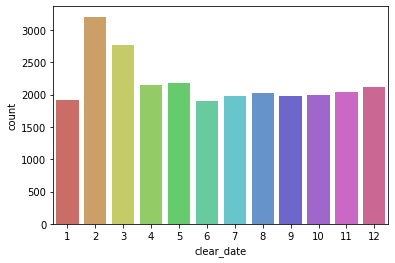

In [51]:
sns.countplot(x=clear_month, palette="hls")

May is the month where the companies completed their maximum transations.

### buisness_year
indicates the year of clear date

In [52]:
train_data.buisness_year.value_counts()

2019.0    22745
2020.0     3515
Name: buisness_year, dtype: int64

As there is only 1 buisness_year we will drop this column.

### document_create_date.1
The date on which the invoice document was created

In [53]:
train_data["document_create_date.1"].min()

Timestamp('2018-12-30 00:00:00')

In [54]:
train_data["document_create_date.1"].max()

Timestamp('2020-02-27 00:00:00')

It ranges for 334 days, almost less than a year

### invoice_currency
The currency of the invoice amount in the document for the invoice

In [55]:
train_data["invoice_currency"].value_counts()

USD    24253
CAD     2007
Name: invoice_currency, dtype: int64

As there are two currencies involved, we can convert either one them. However, as there is not much difference between USD and CAD, there is not much use of converting them.

### total_open_amount
The amount that is yet to be paid for that invoice

In [56]:
train_data['total_open_amount'].describe().apply(lambda x: format(x,'f'))

count     26260.000000
mean      32427.606766
std       39560.646643
min           2.400000
25%        4683.345000
50%       17500.055000
75%       47276.332500
max      639710.380000
Name: total_open_amount, dtype: object

Automatically binning the amount using pd.qcut.

In [57]:
open_amount_bins = pd.qcut(train_data['total_open_amount'],q=10)
open_amount_bins.value_counts()

(2.399, 765.484]          2626
(765.484, 2900.124]       2626
(2900.124, 7021.323]      2626
(7021.323, 12891.616]     2626
(12891.616, 17500.055]    2626
(17500.055, 25734.736]    2626
(25734.736, 39894.995]    2626
(39894.995, 55688.4]      2626
(55688.4, 82640.89]       2626
(82640.89, 639710.38]     2626
Name: total_open_amount, dtype: int64

In [58]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(train_data['total_open_amount'], bins = amount_bins)

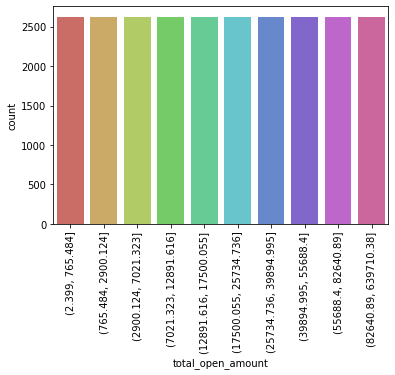

In [59]:
plt.xticks(fontsize=10, rotation=90)
sns.countplot(x=open_amount_bins, palette="hls")

The number of companies in each distribution is same.

### baseline_create_date
The date on which the Invoice was created.

In [60]:
train_data.loc[train_data["document_create_date.1"]!=train_data["baseline_create_date"]]

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
44,CA02,0140105686,SYSC co,2019-01-17,2019.0,2018-12-31,2019-01-13,CAD,24557.30,2019-01-03,CA10,4
129,CA02,0140104423,METRO us,2019-01-15,2019.0,2019-01-02,2019-01-14,CAD,83191.19,2019-01-04,CA10,1
138,CA02,0140104340,COLABOR corporation,2019-01-17,2019.0,2019-01-02,2019-01-14,CAD,18294.15,2019-01-04,CA10,3
164,U001,0200020431,DEC corporation,2019-01-15,2019.0,2019-01-03,2019-01-24,USD,3113.96,2019-01-01,NAM4,-9
171,U001,0200230690,DECA associates,2019-01-10,2019.0,2019-01-03,2019-01-11,USD,47036.18,2019-01-01,NAM2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
26224,CA02,0140104429,COSTCO llc,2020-03-23,2020.0,2020-02-26,2020-03-09,CAD,2201.38,2020-02-28,CA10,14
26236,CA02,0140104409,LOB us,2020-03-09,2020.0,2020-02-26,2020-03-08,CAD,49620.60,2020-02-27,CA10,1
26238,CA02,0140104409,LOB corporation,2020-03-16,2020.0,2020-02-26,2020-03-16,CAD,167684.61,2020-03-06,CA10,0
26242,CA02,0140106408,WAL-M,2020-03-13,2020.0,2020-02-26,2020-03-08,CAD,78455.73,2020-02-27,CA10,5


Baseline create date and document create date are same except if the company is canadian there is a delay in filing the document and creating an invoice. 

It's not that important to our model so we'll drop it.

### cust_payment_terms
Business terms and agreements between customers and accounts on discounts and days of payment.

In [61]:
train_data.cust_payment_terms.value_counts()

NAA8    10673
NAH4     6948
CA10     1950
NAC6      810
NAM4      782
        ...  
NAUX        1
NATL        1
NAVC        1
NATJ        1
NATZ        1
Name: cust_payment_terms, Length: 67, dtype: int64

In [62]:
len(dict(train_data.cust_number.value_counts()))

1185

It is same as cust_number.

### isOpen
- Tells whether a transaction is open or closed

In [67]:
train_data.isOpen.value_counts()

AttributeError: ignored

isOpen is 0 for all the train set as all the invoices has been closed. So we can drop this column.

### Delay
The negative delay specifies that the amount was cleared before the due date and thus there was no delay. Therefore we have capped the negative values to 0.

In [64]:
train_data.delay[train_data.delay<0].count()

9608

In [ ]:
train_data['delay']=train_data.delay.apply(lambda x: 0 if x<0 else x)
train_data.delay[train_data.delay<0].count()

0

In [ ]:
train_data.delay.describe()

count    37251.000000
mean         2.822126
std          9.368047
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        277.000000
Name: delay, dtype: float64

## MULTIVARIATE ANALYSIS

### Relation b/w business_code with invoice_currency

In [ ]:
train_data['invoice_currency'].value_counts()

USD    34365
CAD     2886
Name: invoice_currency, dtype: int64

In [ ]:
train_data.groupby("business_code").invoice_currency.value_counts()

business_code  invoice_currency
CA02           CAD                  2884
U001           USD                 33713
U002           USD                   124
U005           USD                     8
U007           USD                     2
U013           USD                   518
               CAD                     2
Name: invoice_currency, dtype: int64

We see that business code first letter describes in which currency the transaction took place except for 2 entries. Let's explore them further

In [ ]:
train_data.groupby("invoice_currency").business_code.value_counts()

invoice_currency  business_code
CAD               CA02              2884
                  U013                 2
USD               U001             33713
                  U013               518
                  U002               124
                  U005                 8
                  U007                 2
Name: business_code, dtype: int64

business_code U013 is an US based company but paying in CAD

In [ ]:
temp = train_data.loc[train_data['business_code'] == 'U013']
temp.loc[temp['invoice_currency']=='CAD']

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
6441,U013,0100052318,PRATT' trust,2019-03-26,2019.0,2019-03-01,2019-03-31,CAD,1815.04,2019-03-01,NAVE,0,0.0
37009,U013,0100052318,PRATT' co,2019-12-24,2019.0,2019-11-26,2019-12-26,CAD,3373.05,2019-11-26,NAVE,0,0.0


We see that only PRATT company is the only US based company paying in CAD.

Morever they are only 2 transactions so it's not as significant. They don't even have any delay so this won't affect our model.

### Relation between total_open_amount and delay

In [ ]:
delay_bins = [0,15,30,45,60,300]
delay_bucket = pd.cut(train_data['delay'], bins = delay_bins)
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

delay,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 300]"
total_open_amount,,,,,
"(0, 5000]",3226,130,109,102,98
"(5000, 10000]",1467,76,61,36,20
"(10000, 50000]",6223,293,183,113,66
"(50000, 100000]",2507,68,19,12,15
"(100000, 1100000]",1152,20,12,8,3


<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

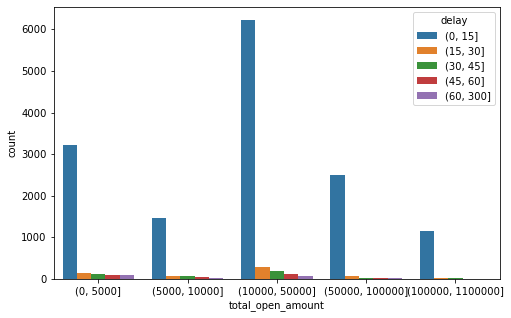

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

As we can see from the graph for each bucket the amount was returned in 0-15 delay days.

In [ ]:
train_data.corr()

,buisness_year,total_open_amount,isOpen,delay
buisness_year,NaN,NaN,NaN,NaN
total_open_amount,NaN,1.000000,NaN,-0.047619
isOpen,NaN,NaN,NaN,NaN
delay,NaN,-0.047619,NaN,1.000000


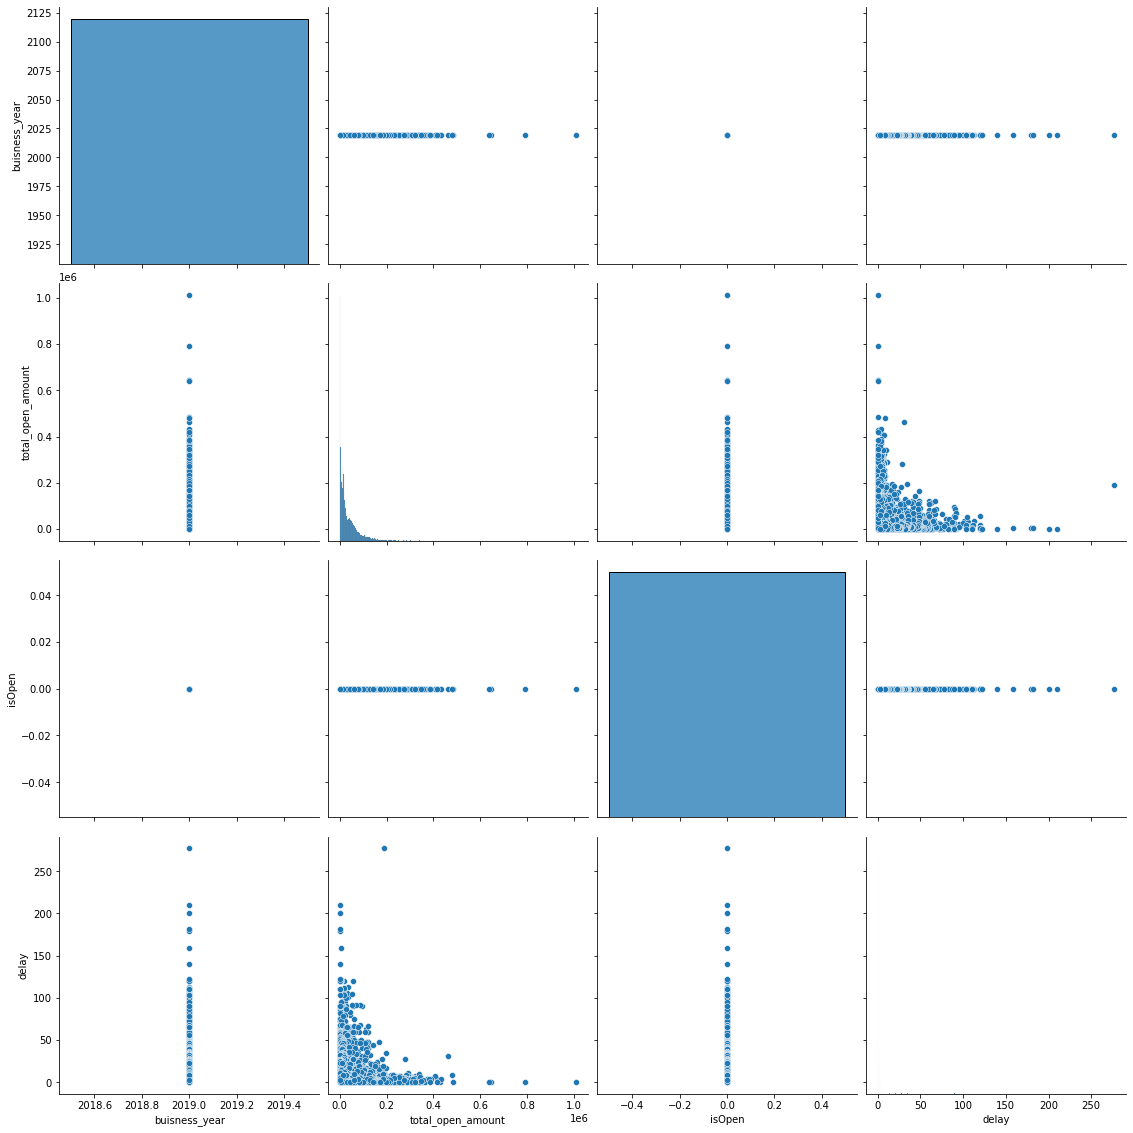

In [ ]:
sns.pairplot(train_data, height=4)

We can infer: The total open amount decreses as the delay increases. There is negative co-relation.

# FEATURE ENGINEERING

In [ ]:
train_data.drop(columns=['business_code', 'name_customer','buisness_year','invoice_currency','baseline_create_date', 'cust_payment_terms', 'isOpen'], inplace=True)
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay
0,0200769623,2019-01-09,2018-12-30,2019-01-14,25749.68,0.0
1,0200762301,2019-01-15,2018-12-30,2019-01-14,18116.87,1.0
2,0200955827,2019-01-16,2018-12-30,2019-01-14,32856.32,2.0
3,0200744019,2019-01-18,2018-12-30,2019-01-14,11982.59,4.0
4,0200794332,2019-01-14,2018-12-30,2019-01-14,32715.47,0.0
...,...,...,...,...,...,...
37266,0200769623,2019-12-09,2019-11-28,2019-12-13,31752.94,0.0
37267,0200744019,2019-12-12,2019-11-28,2019-12-13,45591.41,0.0
37268,0200769623,2019-12-16,2019-11-28,2019-12-13,61336.27,3.0
37269,0140105847,2019-12-17,2019-11-28,2019-12-08,13937.60,9.0


Extracting day and month from document_create_date.1 and due_in_date.

In [ ]:
train_data["doc_create_day"] = train_data["document_create_date.1"].dt.day
train_data["doc_create_month"] = train_data["document_create_date.1"].dt.month

train_data["due_day"] = train_data["due_in_date"].dt.day
train_data["due_month"] = train_data["due_in_date"].dt.month

In [ ]:
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,2019-01-09,2018-12-30,2019-01-14,25749.68,0.0,30,12,14,1
1,0200762301,2019-01-15,2018-12-30,2019-01-14,18116.87,1.0,30,12,14,1
2,0200955827,2019-01-16,2018-12-30,2019-01-14,32856.32,2.0,30,12,14,1
3,0200744019,2019-01-18,2018-12-30,2019-01-14,11982.59,4.0,30,12,14,1
4,0200794332,2019-01-14,2018-12-30,2019-01-14,32715.47,0.0,30,12,14,1
...,...,...,...,...,...,...,...,...,...,...
37266,0200769623,2019-12-09,2019-11-28,2019-12-13,31752.94,0.0,28,11,13,12
37267,0200744019,2019-12-12,2019-11-28,2019-12-13,45591.41,0.0,28,11,13,12
37268,0200769623,2019-12-16,2019-11-28,2019-12-13,61336.27,3.0,28,11,13,12
37269,0140105847,2019-12-17,2019-11-28,2019-12-08,13937.60,9.0,28,11,8,12


In [ ]:
train_data.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
train_data

,cust_number,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,25749.68,0.0,30,12,14,1
1,0200762301,18116.87,1.0,30,12,14,1
2,0200955827,32856.32,2.0,30,12,14,1
3,0200744019,11982.59,4.0,30,12,14,1
4,0200794332,32715.47,0.0,30,12,14,1
...,...,...,...,...,...,...,...
37266,0200769623,31752.94,0.0,28,11,13,12
37267,0200744019,45591.41,0.0,28,11,13,12
37268,0200769623,61336.27,3.0,28,11,13,12
37269,0140105847,13937.60,9.0,28,11,8,12


Extracting the integer part from cust_number

In [ ]:
train_data['cn'] = train_data['cust_number'].str.extract('(\d+)')

# then will drop that column
train_data.drop('cust_number',axis=1,inplace=True)

#lets see the dataframe
train_data

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,25749.68,0.0,30,12,14,1,0200769623
1,18116.87,1.0,30,12,14,1,0200762301
2,32856.32,2.0,30,12,14,1,0200955827
3,11982.59,4.0,30,12,14,1,0200744019
4,32715.47,0.0,30,12,14,1,0200794332
...,...,...,...,...,...,...,...
37266,31752.94,0.0,28,11,13,12,0200769623
37267,45591.41,0.0,28,11,13,12,0200744019
37268,61336.27,3.0,28,11,13,12,0200769623
37269,13937.60,9.0,28,11,8,12,0140105847


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37251 entries, 0 to 37270
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  37251 non-null  float64
 1   delay              37251 non-null  float64
 2   doc_create_day     37251 non-null  int64  
 3   doc_create_month   37251 non-null  int64  
 4   due_day            37251 non-null  int64  
 5   due_month          37251 non-null  int64  
 6   cn                 37251 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 3.5+ MB


Converting the data-type of cn as float

In [ ]:
train_data['cn']=train_data['cn'].astype(str).astype(float)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37251 entries, 0 to 37270
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  37251 non-null  float64
 1   delay              37251 non-null  float64
 2   doc_create_day     37251 non-null  int64  
 3   doc_create_month   37251 non-null  int64  
 4   due_day            37251 non-null  int64  
 5   due_month          37251 non-null  int64  
 6   cn                 37251 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.5 MB


Splitting into x_train and y_train

In [ ]:
y_train = train_data['delay']
y_train

0        0.0
1        1.0
2        2.0
3        4.0
4        0.0
        ... 
37266    0.0
37267    0.0
37268    3.0
37269    9.0
37270    3.0
Name: delay, Length: 37251, dtype: float64

In [ ]:
x_train = train_data.drop(["delay"], axis=1).copy()
x_train

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,25749.68,30,12,14,1,200769623.0
1,18116.87,30,12,14,1,200762301.0
2,32856.32,30,12,14,1,200955827.0
3,11982.59,30,12,14,1,200744019.0
4,32715.47,30,12,14,1,200794332.0
...,...,...,...,...,...,...
37266,31752.94,28,11,13,12,200769623.0
37267,45591.41,28,11,13,12,200744019.0
37268,61336.27,28,11,13,12,200769623.0
37269,13937.60,28,11,8,12,140105847.0


##### Now we need to repeat the same process on val1, val2 and x_test.

In [ ]:
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246 entries, 0 to 3245
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           3246 non-null   object        
 1   cust_number             3246 non-null   object        
 2   name_customer           3246 non-null   object        
 3   clear_date              3246 non-null   datetime64[ns]
 4   buisness_year           3246 non-null   float64       
 5   document_create_date.1  3246 non-null   datetime64[ns]
 6   due_in_date             3246 non-null   datetime64[ns]
 7   invoice_currency        3246 non-null   object        
 8   total_open_amount       3246 non-null   float64       
 9   baseline_create_date    3246 non-null   datetime64[ns]
 10  cust_payment_terms      3246 non-null   object        
 11  isOpen                  3246 non-null   int64         
 12  delay                   3246 non-null   float64 

In [ ]:
val1['delay']=val1.delay.apply(lambda x: 0 if x<0 else x)
val1.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val1["doc_create_day"] = val1["document_create_date.1"].dt.day
val1["doc_create_month"] = val1["document_create_date.1"].dt.month

val1["due_day"] = val1["due_in_date"].dt.day
val1["due_month"] = val1["due_in_date"].dt.month

val1['cn'] = val1['cust_number'].str.extract('(\d+)')
val1.drop('cust_number',axis=1,inplace=True)

val1.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val1

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,21748.48,0.0,28,11,13,12,0200763152
1,70698.34,0.0,28,11,13,12,0200769623
2,897.46,5.0,28,11,13,12,0200769623
3,2367.26,3.0,28,11,16,12,0140106408
4,34027.91,3.0,28,11,13,12,0200744019
...,...,...,...,...,...,...,...
3241,2020.42,0.0,12,1,27,1,0200726979
3242,256.91,0.0,12,1,27,1,0200769623
3243,256.91,0.0,12,1,27,1,0200769623
3244,1118.71,0.0,12,1,27,1,0200769623


In [ ]:
val1['cn']=val1['cn'].astype(str).astype(float)
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246 entries, 0 to 3245
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  3246 non-null   float64
 1   delay              3246 non-null   float64
 2   doc_create_day     3246 non-null   int64  
 3   doc_create_month   3246 non-null   int64  
 4   due_day            3246 non-null   int64  
 5   due_month          3246 non-null   int64  
 6   cn                 3246 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 177.6 KB


Splitting into x_val and y_val

In [ ]:
y_val1 = val1['delay']
y_val1

0       0.0
1       0.0
2       5.0
3       3.0
4       3.0
       ... 
3241    0.0
3242    0.0
3243    0.0
3244    0.0
3245    0.0
Name: delay, Length: 3246, dtype: float64

In [ ]:
x_val1 = val1.drop(["delay"], axis=1).copy()
x_val1

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,21748.48,28,11,13,12,200763152.0
1,70698.34,28,11,13,12,200769623.0
2,897.46,28,11,13,12,200769623.0
3,2367.26,28,11,16,12,140106408.0
4,34027.91,28,11,13,12,200744019.0
...,...,...,...,...,...,...
3241,2020.42,12,1,27,1,200726979.0
3242,256.91,12,1,27,1,200769623.0
3243,256.91,12,1,27,1,200769623.0
3244,1118.71,12,1,27,1,200769623.0


In [ ]:
val2['delay']=val2.delay.apply(lambda x: 0 if x<0 else x)
val2.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val2["doc_create_day"] = val2["document_create_date.1"].dt.day
val2["doc_create_month"] = val2["document_create_date.1"].dt.month

val2["due_day"] = val2["due_in_date"].dt.day
val2["due_month"] = val2["due_in_date"].dt.month

val2['cn'] = val2['cust_number'].str.extract('(\d+)')
val2.drop('cust_number',axis=1,inplace=True)

val2.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val2

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,32547.72,0.0,13,1,28,1,0200789077
1,4388.75,0.0,13,1,28,1,0200769623
2,6040.68,0.0,13,1,28,1,0200769623
3,71525.23,0.0,13,1,28,1,0200769623
4,231.24,0.0,13,1,28,1,0200117492
...,...,...,...,...,...,...,...
4654,2878.29,11.0,27,2,9,3,0140106408
4655,10770.76,0.0,27,2,2,5,0200721222
4656,39408.22,3.0,27,2,13,3,0200744707
4657,70504.55,0.0,27,2,13,3,0200759878


In [ ]:
val2['cn']=val2['cn'].astype(str).astype(float)
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659 entries, 0 to 4658
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  4659 non-null   float64
 1   delay              4659 non-null   float64
 2   doc_create_day     4659 non-null   int64  
 3   doc_create_month   4659 non-null   int64  
 4   due_day            4659 non-null   int64  
 5   due_month          4659 non-null   int64  
 6   cn                 4659 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 254.9 KB


In [ ]:
y_val2 = val2['delay']
y_val2

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
4654    11.0
4655     0.0
4656     3.0
4657     0.0
4658     2.0
Name: delay, Length: 4659, dtype: float64

In [ ]:
x_val2 = val2.drop(["delay"], axis=1).copy()
x_val2

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,32547.72,13,1,28,1,200789077.0
1,4388.75,13,1,28,1,200769623.0
2,6040.68,13,1,28,1,200769623.0
3,71525.23,13,1,28,1,200769623.0
4,231.24,13,1,28,1,200117492.0
...,...,...,...,...,...,...
4654,2878.29,27,2,9,3,140106408.0
4655,10770.76,27,2,2,5,200721222.0
4656,39408.22,27,2,13,3,200744707.0
4657,70504.55,27,2,13,3,200759878.0


In [ ]:
x_test.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

x_test["doc_create_day"] = x_test["document_create_date.1"].dt.day
x_test["doc_create_month"] = x_test["document_create_date.1"].dt.month

x_test["due_day"] = x_test["due_in_date"].dt.day
x_test["due_month"] = x_test["due_in_date"].dt.month

x_test['cn'] = x_test['cust_number'].str.extract('(\d+)')
x_test.drop('cust_number',axis=1,inplace=True)

x_test.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
x_test

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,16157.16,27,2,13,3,0200772595
1,722.50,27,2,10,3,0140105847
2,4206.28,27,2,13,3,0200744019
3,51877.23,27,2,13,3,0200943275
4,365.88,27,2,13,3,0200726979
...,...,...,...,...,...,...
4814,1226.00,12,5,24,5,0200592182
4815,36513.74,12,5,27,5,200769623
4816,15220.00,13,5,28,5,0200915438
4817,17893.25,16,5,31,5,100030964


In [ ]:
x_test['cn']=x_test['cn'].astype(str).astype(float)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  4819 non-null   float64
 1   doc_create_day     4819 non-null   int64  
 2   doc_create_month   4819 non-null   int64  
 3   due_day            4819 non-null   int64  
 4   cn                 4819 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 188.4 KB


# FEATURE SELECTION

<AxesSubplot:>

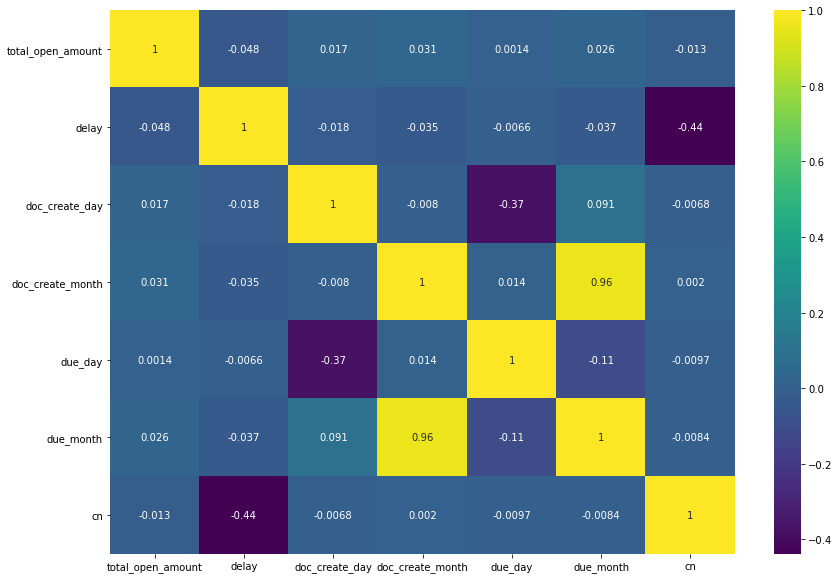

In [ ]:
plt.figure(figsize=(14,10))
cor = train_data.corr()
sns.heatmap(cor,cmap = 'viridis',annot=True)

As we can see from the above graph due_month and doc_create_month are highly correlated and thus they will have a negative impact on our model. So drop remove due_month. 

In [ ]:
x_train = x_train.drop(["due_month"], axis=1).copy()
x_val1 = x_val1.drop(["due_month"], axis=1).copy()
x_val2 = x_val2.drop(["due_month"], axis=1).copy()
x_test = x_test.drop(["due_month"], axis=1).copy()

# MODELING

As this is a regression model we will use the following models:-
- Linear Regressor
- SVR
- Decision Tree
- Random Forest
- XgBoost

### XGBoost

In [ ]:
#fitting the model 

clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted = clf.predict(x_val1)

In [ ]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted), 2))
print("Accuracy= ", clf.score(x_val1,y_val1))

Mean absolute error = 1.82
Mean squared error = 18.13
Median absolute error = 0.85
Explain variance score = 0.51
R2 score = 0.51
Accuracy=  0.5067037516860886


### Random Forest

In [ ]:
clf2 = RandomForestRegressor()
clf2.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted2 = clf2.predict(x_val1)

In [ ]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted2), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted2), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted2), 2))
print("Accuracy= ", clf2.score(x_val1,y_val1))

Mean absolute error = 2.08
Mean squared error = 19.05
Median absolute error = 1.03
Explain variance score = 0.51
R2 score = 0.48
Accuracy=  0.481575048144291


### DecisionTreeRegressor

In [ ]:
# Fitting Decision Tree Regressor to the Training Set
clf3 = DecisionTreeRegressor()
clf3.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted3 = clf3.predict(x_val1)

In [ ]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted3), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted3), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted3), 2))
print("Accuracy= ", clf3.score(x_val1,y_val1))

Mean absolute error = 2.24
Mean squared error = 53.16
Median absolute error = 1.0
Explain variance score = -0.43
R2 score = -0.45
Accuracy=  -0.44636587721378373


### LinearRegression

In [ ]:
# Fitting Simple Linear Regression to the Training Set
clf5 = LinearRegression()
clf5.fit(x_train, y_train)

# Predicting the Test Set Results
predicted5 = clf.predict(x_val1)

In [ ]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted5), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted5), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted5), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted5), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted5), 2))
print("Accuracy= ", clf5.score(x_val1,y_val1))

Mean absolute error = 1.82
Mean squared error = 18.13
Median absolute error = 0.85
Explain variance score = 0.51
R2 score = 0.51
Accuracy=  0.32265869429822236


#### We'll continue with XgBoost as it gives us the best result from all the other models.

### HYPER-PARAMETER TUNING

In [ ]:
# now we will hypertune our parameters for better and accurate results and avoiding overfitting

# we will set some parameter
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In this we will fit and check for best parameters for our model using RandomizedSearchCV

In [ ]:
reg=xgb.XGBRegressor()
random_search=RandomizedSearchCV(reg,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   16.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   18.7s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

Checking for best parameters.

In [ ]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Using these parameters and checking against val2

In [ ]:
cl = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=8,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
cl.fit(x_train, y_train)
# Predicting the Test Set Results
predicted = cl.predict(x_val2)

In [ ]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val2, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val2, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val2, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val2, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_val2, predicted), 2))
print("Accuracy= ", cl.score(x_val2,y_val2))

Mean absolute error = 2.34
Mean squared error = 30.33
Median absolute error = 1.16
Explain variance score = 0.49
R2 score = 0.49
Accuracy=  0.4925351710531721


# TEST

In [ ]:
predicted1 = cl.predict(x_test)

In [ ]:
predicted1=np.around(predicted1)
predicted1.astype(int)

array([1, 7, 3, ..., 3, 9, 4])

In [ ]:
len(predicted1)

4819

We got the delay on test set.

In [ ]:
Col=pd.DataFrame()

Appending the delay predicted column in it

In [ ]:
Delay=[]
for x in predicted1:
    Delay.append(pd.Timedelta(days=x))
Col['Delay'] = Delay
Col

,Delay
0,1 days
1,7 days
2,3 days
3,1 days
4,1 days
...,...
4814,1 days
4815,0 days
4816,3 days
4817,9 days


Predicting the clear date

In [ ]:
Col['clear_date'] = ts['due_in_date']+Col['Delay']
Col

,Delay,clear_date
0,1 days,2020-03-14
1,7 days,2020-03-17
2,3 days,2020-03-16
3,1 days,2020-03-14
4,1 days,2020-03-14
...,...,...
4814,1 days,2020-05-25
4815,0 days,2020-05-27
4816,3 days,2020-05-31
4817,9 days,2020-06-09


# Creating the Aging Bucket

In [ ]:
aging_bucket = []
for x in predicted1:
    if x<=15:
        aging_bucket.append("0-15days")
    elif x<=30:
        aging_bucket.append("16-30days")
    elif x<=45:
        aging_bucket.append("31-45days")
    elif x<=60:
        aging_bucket.append("46-60days")
    else:
        aging_bucket.append("Greater than 60 days")
Col['Aging Bucket']= aging_bucket
Col.drop(['Delay'],axis=1,inplace=True)
Col

,clear_date,Aging Bucket
0,2020-03-14,0-15days
1,2020-03-17,0-15days
2,2020-03-16,0-15days
3,2020-03-14,0-15days
4,2020-03-14,0-15days
...,...,...
4814,2020-05-25,0-15days
4815,2020-05-27,0-15days
4816,2020-05-31,0-15days
4817,2020-06-09,0-15days
